In [77]:
avg_work = 24_000
conversion_rate = 0.15
seed = 4_8000

# history_new_customers = [0]
# new_customers = 0
# for year in range(1,10):
#     nexrt_new_customers = new_customers * avg_referrals * conversion_rate + avg_work
#     history_new_customers.append(nexrt_new_customers)
#     history_user_base.append(history_user_base[-1] + nexrt_new_customers)

#     new_customers = nexrt_new_customers

history_seed = []
history_k = []
history_total = []
for year in range(1, 10):
    k  = seed * conversion_rate
    total = seed + k
    history_seed.append(seed)
    history_k.append(k)
    history_total.append(total)

    seed = total + avg_work

history_user_base = history_total

0     55200.000000
1     91080.000000
2    132342.000000
3    179793.300000
4    234362.295000
5    297116.639250
6    369284.135138
7    452276.755408
8    547718.268719
dtype: float64

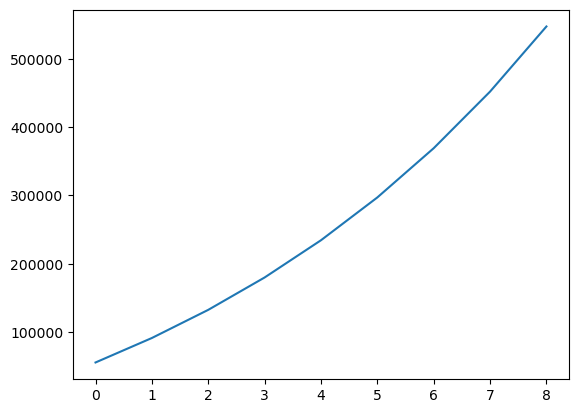

In [78]:
import pandas as pd

history_user_base =  pd.Series(history_user_base)
history_user_base.plot()
pd.DataFrame(history_user_base / 10_000).T.to_csv('history_user_base.csv')
history_user_base

In [79]:
game_2_invest_conversion_rate = 0.05
invest_user_base = history_user_base * game_2_invest_conversion_rate
pd.DataFrame(invest_user_base / 10_000).T.to_csv('invest_user_base.csv')

0    3.588000e+07
1    5.920200e+07
2    8.602230e+07
3    1.168656e+08
4    1.523355e+08
5    1.931258e+08
6    2.400347e+08
7    2.939799e+08
8    3.560169e+08
dtype: float64

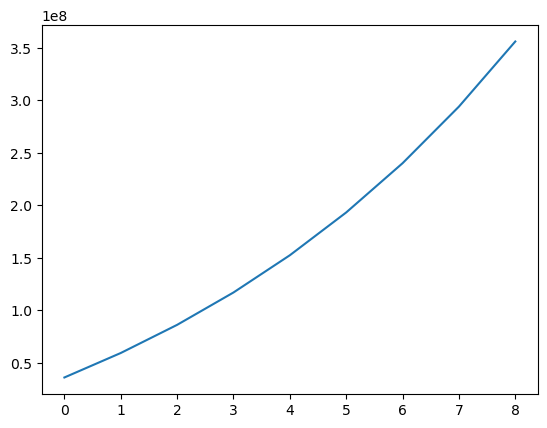

In [80]:
normal_capital = 13_000
annual_return = 0.05

capital_base = invest_user_base * normal_capital
capital_base.plot()
pd.DataFrame(capital_base / 100_000_000).T.to_csv('capital_base.csv')
capital_base

0    3.588000e+07
1    5.920200e+07
2    8.602230e+07
3    1.168656e+08
4    1.523355e+08
5    1.931258e+08
6    2.400347e+08
7    2.939799e+08
8    3.560169e+08
dtype: float64

,capital_growth
0,NaN
1,2.332200e+07
2,2.682030e+07
3,3.084334e+07
4,3.546985e+07
5,4.079032e+07
6,4.690887e+07
7,5.394520e+07
8,6.203698e+07


,capital_growth,0,1,2,3,4,5,6,7,8
0,3.588000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.332200e+07,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.682030e+07,1.05,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.084334e+07,1.05,1.05,1.05,NaN,NaN,NaN,NaN,NaN,NaN
4,3.546985e+07,1.05,1.05,1.05,1.05,NaN,NaN,NaN,NaN,NaN
5,4.079032e+07,1.05,1.05,1.05,1.05,1.05,NaN,NaN,NaN,NaN
6,4.690887e+07,1.05,1.05,1.05,1.05,1.05,1.05,NaN,NaN,NaN
7,5.394520e+07,1.05,1.05,1.05,1.05,1.05,1.05,1.05,NaN,NaN
8,6.203698e+07,1.05,1.05,1.05,1.05,1.05,1.05,1.05,1.05,NaN


,capital_growth,0,1,2,3,4,5,6,7,8
0,3.588000e+07,3.588000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.332200e+07,3.767400e+07,2.332200e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.682030e+07,3.955770e+07,2.448810e+07,2.682030e+07,NaN,NaN,NaN,NaN,NaN,NaN
3,3.084334e+07,4.153558e+07,2.571250e+07,2.816132e+07,3.084334e+07,NaN,NaN,NaN,NaN,NaN
4,3.546985e+07,4.361236e+07,2.699813e+07,2.956938e+07,3.238551e+07,3.546985e+07,NaN,NaN,NaN,NaN
5,4.079032e+07,4.579298e+07,2.834804e+07,3.104785e+07,3.400479e+07,3.724334e+07,4.079032e+07,NaN,NaN,NaN
6,4.690887e+07,4.808263e+07,2.976544e+07,3.260024e+07,3.570503e+07,3.910551e+07,4.282984e+07,4.690887e+07,NaN,NaN
7,5.394520e+07,5.048676e+07,3.125371e+07,3.423025e+07,3.749028e+07,4.106078e+07,4.497133e+07,4.925432e+07,5.394520e+07,NaN
8,6.203698e+07,5.301110e+07,3.281640e+07,3.594177e+07,3.936479e+07,4.311382e+07,4.721990e+07,5.171703e+07,5.664246e+07,6.203698e+07


0    3.588000e+07
1    6.099600e+07
2    9.086610e+07
3    1.262527e+08
4    1.680352e+08
5    2.172273e+08
6    2.749976e+08
7    3.426926e+08
8    4.218643e+08
dtype: float64

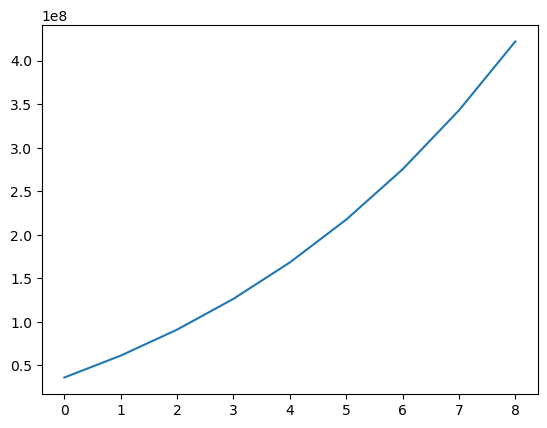

In [81]:
import numpy as np

capital_growth = pd.DataFrame(capital_base.diff().rename('capital_growth'))
display(capital_base)
exp_growth = capital_growth.copy()
exp_growth.loc[0] = capital_base.loc[0]
display(capital_growth)
for i in exp_growth.index:
    exp_growth.loc[:, i] =pd.Series([np.nan] * (1 + i) + [1 + annual_return] * (len(exp_growth) - i))
display(exp_growth)
for i in exp_growth.index:
    se = exp_growth.loc[:, i]
    se[i] = exp_growth['capital_growth'].loc[i]
    exp_growth.loc[:, i] = se.cumprod()
display(exp_growth)
exp_growth = exp_growth.iloc[:, 1:].sum(axis=1)
display(exp_growth)
exp_growth.plot()
pd.DataFrame(exp_growth / 100_000_000).T.to_csv('exp_growth.csv')

In [82]:
yeardict = {
    1:'一',
    2:'二',
    3:'三',
    4:'四',
    5:'五',
    6:'六',
    7:'七',
    8:'八',
    9:'九'
}
df = pd.DataFrame(
    [
pd.Series(history_seed).rename('种子用户数W') / 10_000,
pd.Series(history_k).rename('裂变用户数W（15%）') / 10_000,
pd.Series(history_total).rename('总数客户数W') / 10_000,
pd.Series(invest_user_base).rename('5%客户数转普通客户') / 10_000,
pd.Series(capital_base).rename('普通客户人均1W份额（亿）') / 1_0000_0000,
pd.Series(exp_growth).rename('年化5%规模（亿）') / 1_0000_0000
])
df.columns = [f'第{yeardict[i]}年' for i in range(1, 10)]
df.to_csv('{}.csv'.format(normal_capital))